# Data  preprocessing

In [1]:
import numpy as np
import pandas as pd
import sys

#from sklearn import manifold
#from scipy import stats

import matplotlib.pyplot as plt
plt.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])

In [2]:
raw_df = pd.read_csv("./data/guo2010Data.txt", header='infer', index_col=0, sep="\t", encoding=sys.getfilesystemencoding())
raw_df = raw_df.transpose()

cell_stage = raw_df['Stage'].astype('int')
raw_df = raw_df.drop('Stage',1)

cell_names = raw_df.index.values
gene_names = raw_df.columns.values

raw_df.shape[0]

438

In [3]:
from SCOUT import *

Dimension reduction with locally_linear_embedding(LLE).



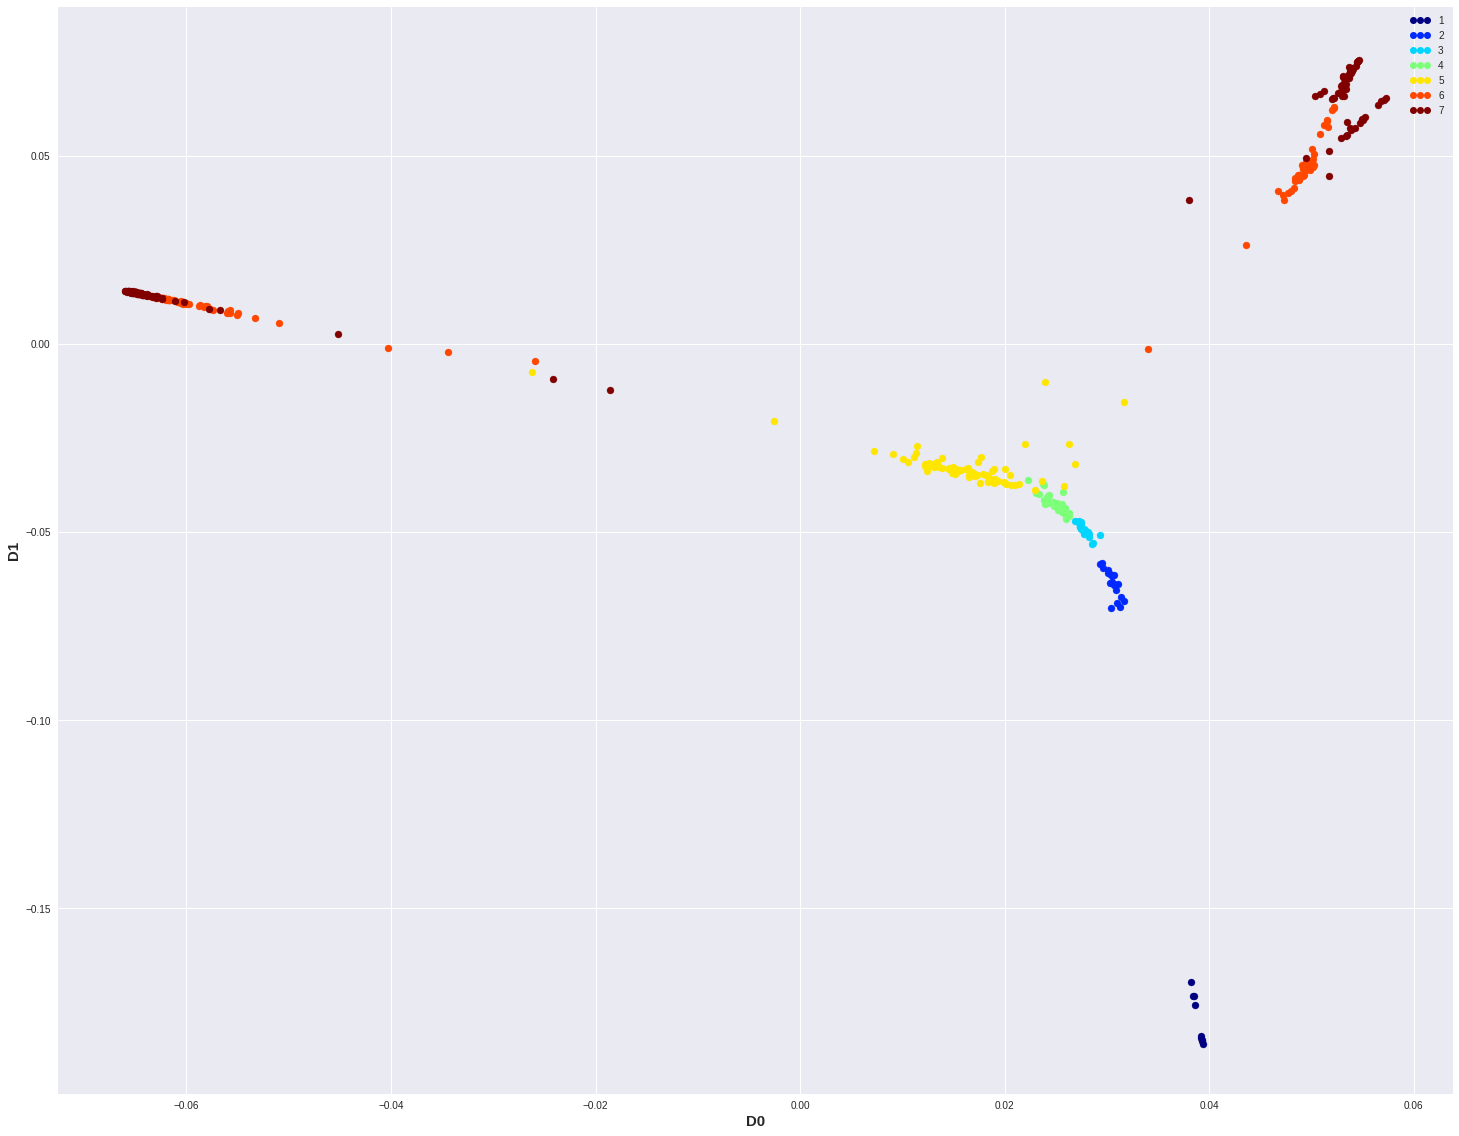

In [4]:
Z = SCOUT(raw_df, stages=cell_stage)
V = Z.dim_down(method='lle',rand_seed=6)
Z.plotD(V)

Clustering with Gaussian Mixture
branches:
 [[3, 13, 7, 1, 12, 8, 4, 6, 10, 14, 0], [9, 2, 5, 11, 8, 12, 1, 7, 13, 3], [9, 2, 5, 11, 8, 4, 6, 10, 14, 0]]


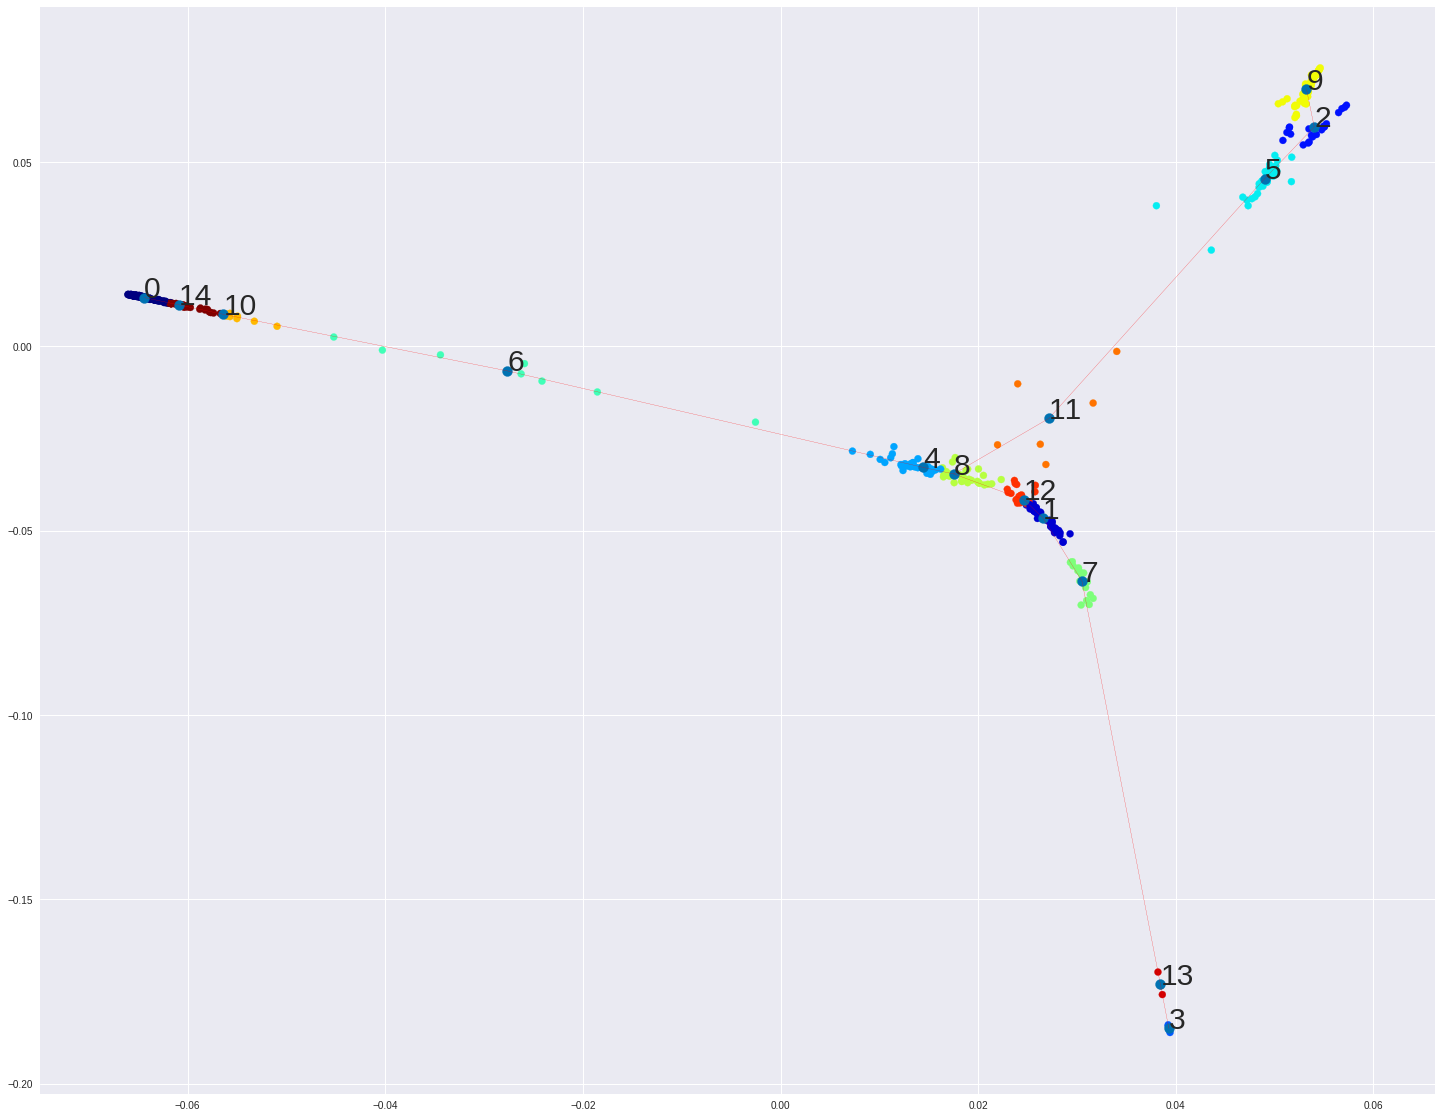

In [5]:
centroids,labels = Z.clustering(V,method='gmm',cov='full',nclust=15)
# Tcsr,edges = Z.get_MST()
Z.plotD(V)

In [6]:
# branches = Z.traj_centroids()
# print(branchs)
# print(branchs[1][::-1])
branches = [[3, 13, 7, 1, 12, 8, 4, 6, 10, 14, 0],[3, 13, 7, 1, 12, 11, 5, 2],[3, 13, 7, 1, 12, 11, 5, 9]]
branches

[[3, 13, 7, 1, 12, 8, 4, 6, 10, 14, 0],
 [3, 13, 7, 1, 12, 11, 5, 2],
 [3, 13, 7, 1, 12, 11, 5, 9]]

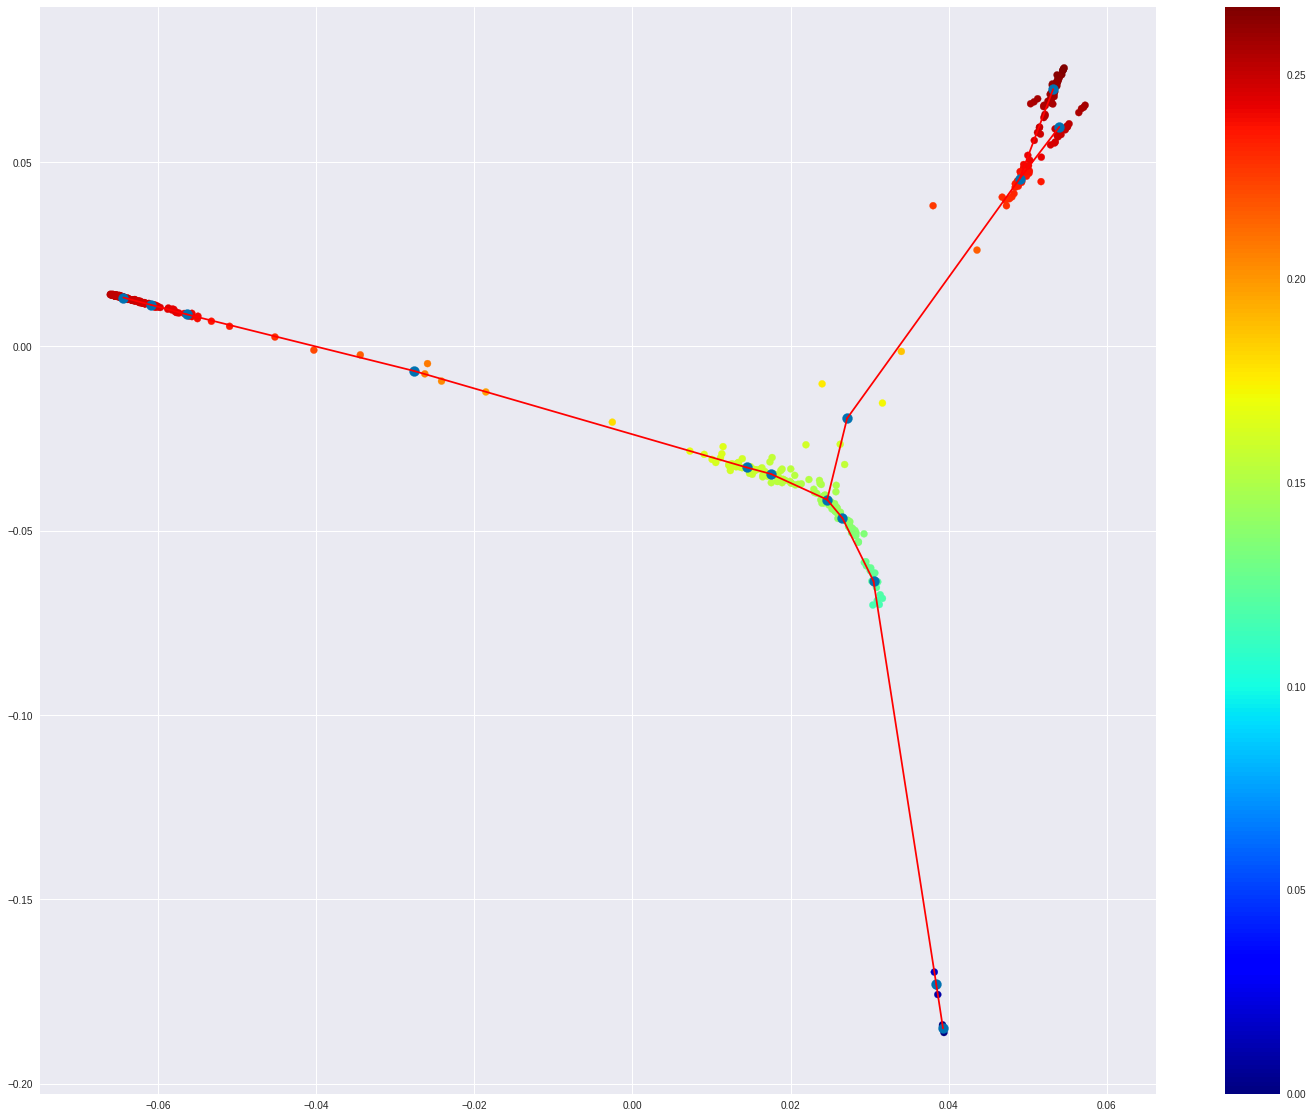

In [7]:
cell_scores,cell_order = Z.get_ordering(V,branches, method = 'ap')
Z.plotT(V,cell_scores)

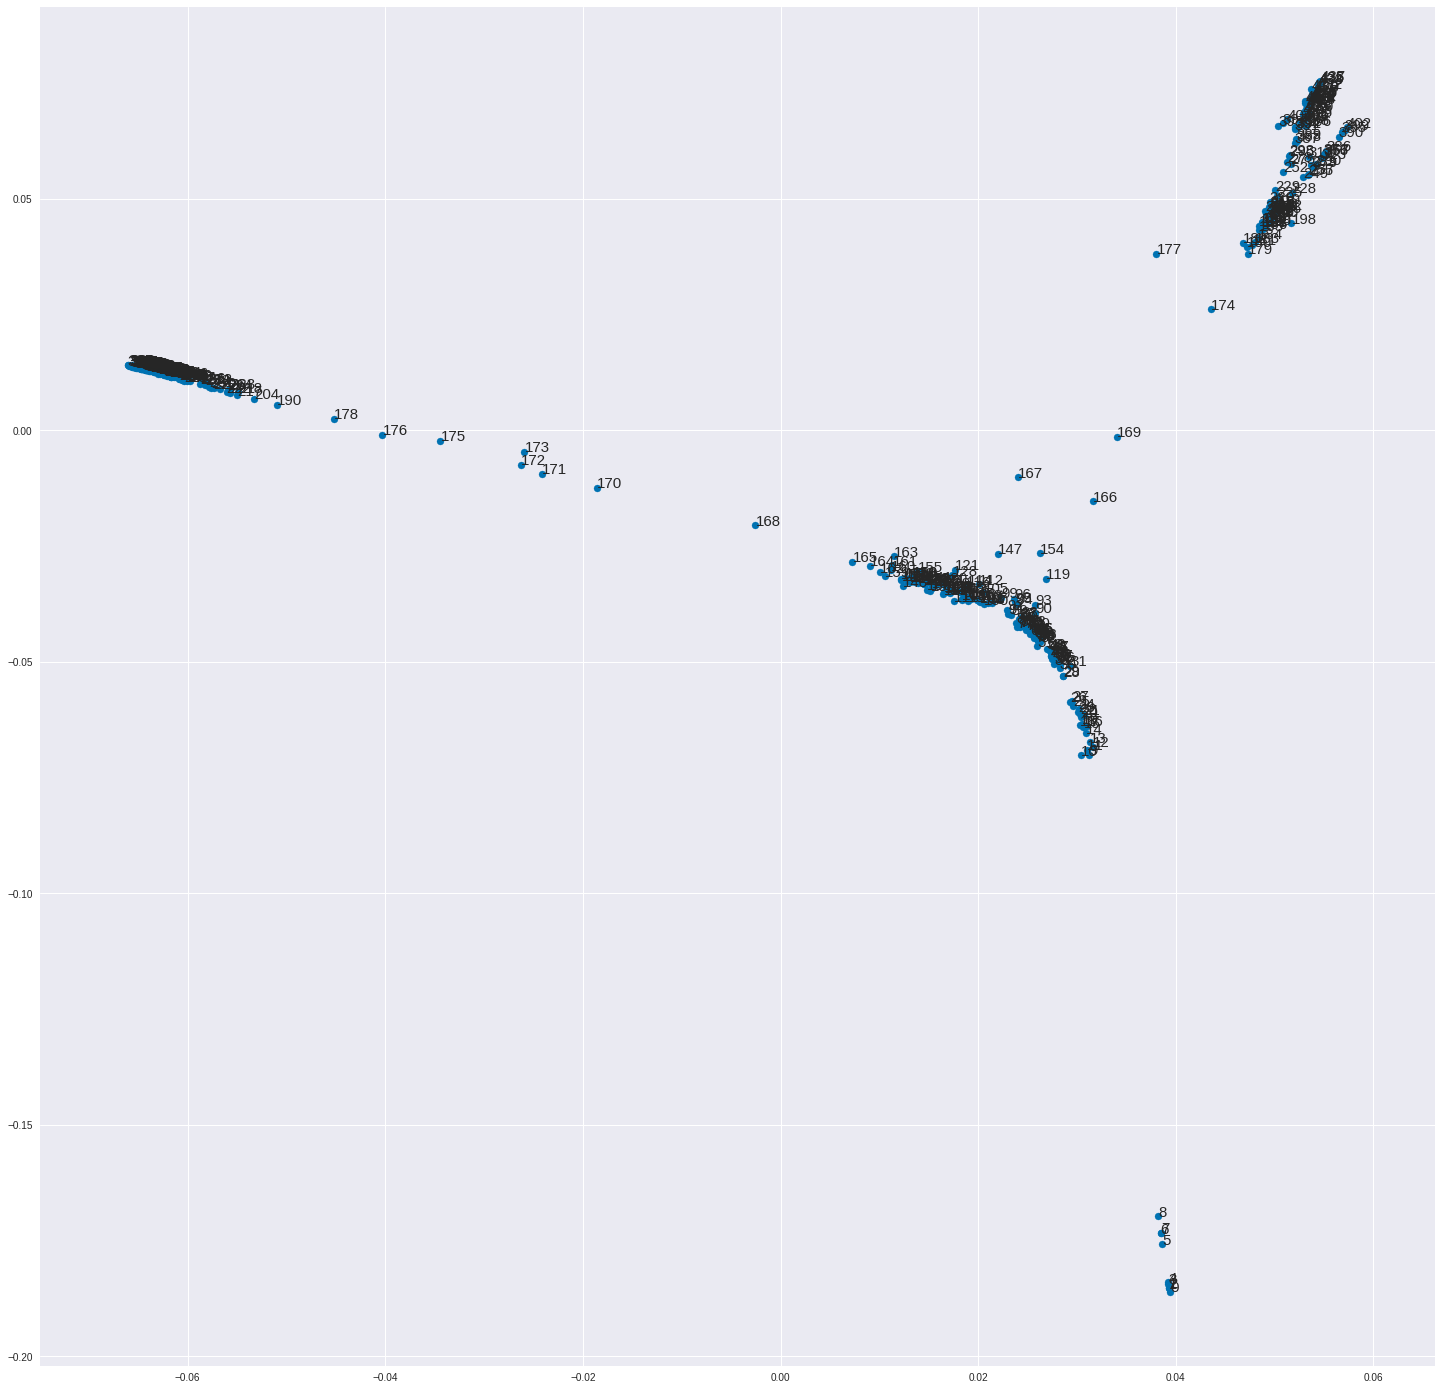

In [8]:
fig = plt.figure(figsize=(25,25))
plt.scatter(V[:,0],V[:,1])

orders = sorted(range(len(cell_scores)), key=lambda k: cell_scores[k])

for ind,ord in enumerate(orders):
        plt.annotate(ind,xy=(V[:,0][ord],V[:,1][ord]),fontsize=15)
    
plt.show()

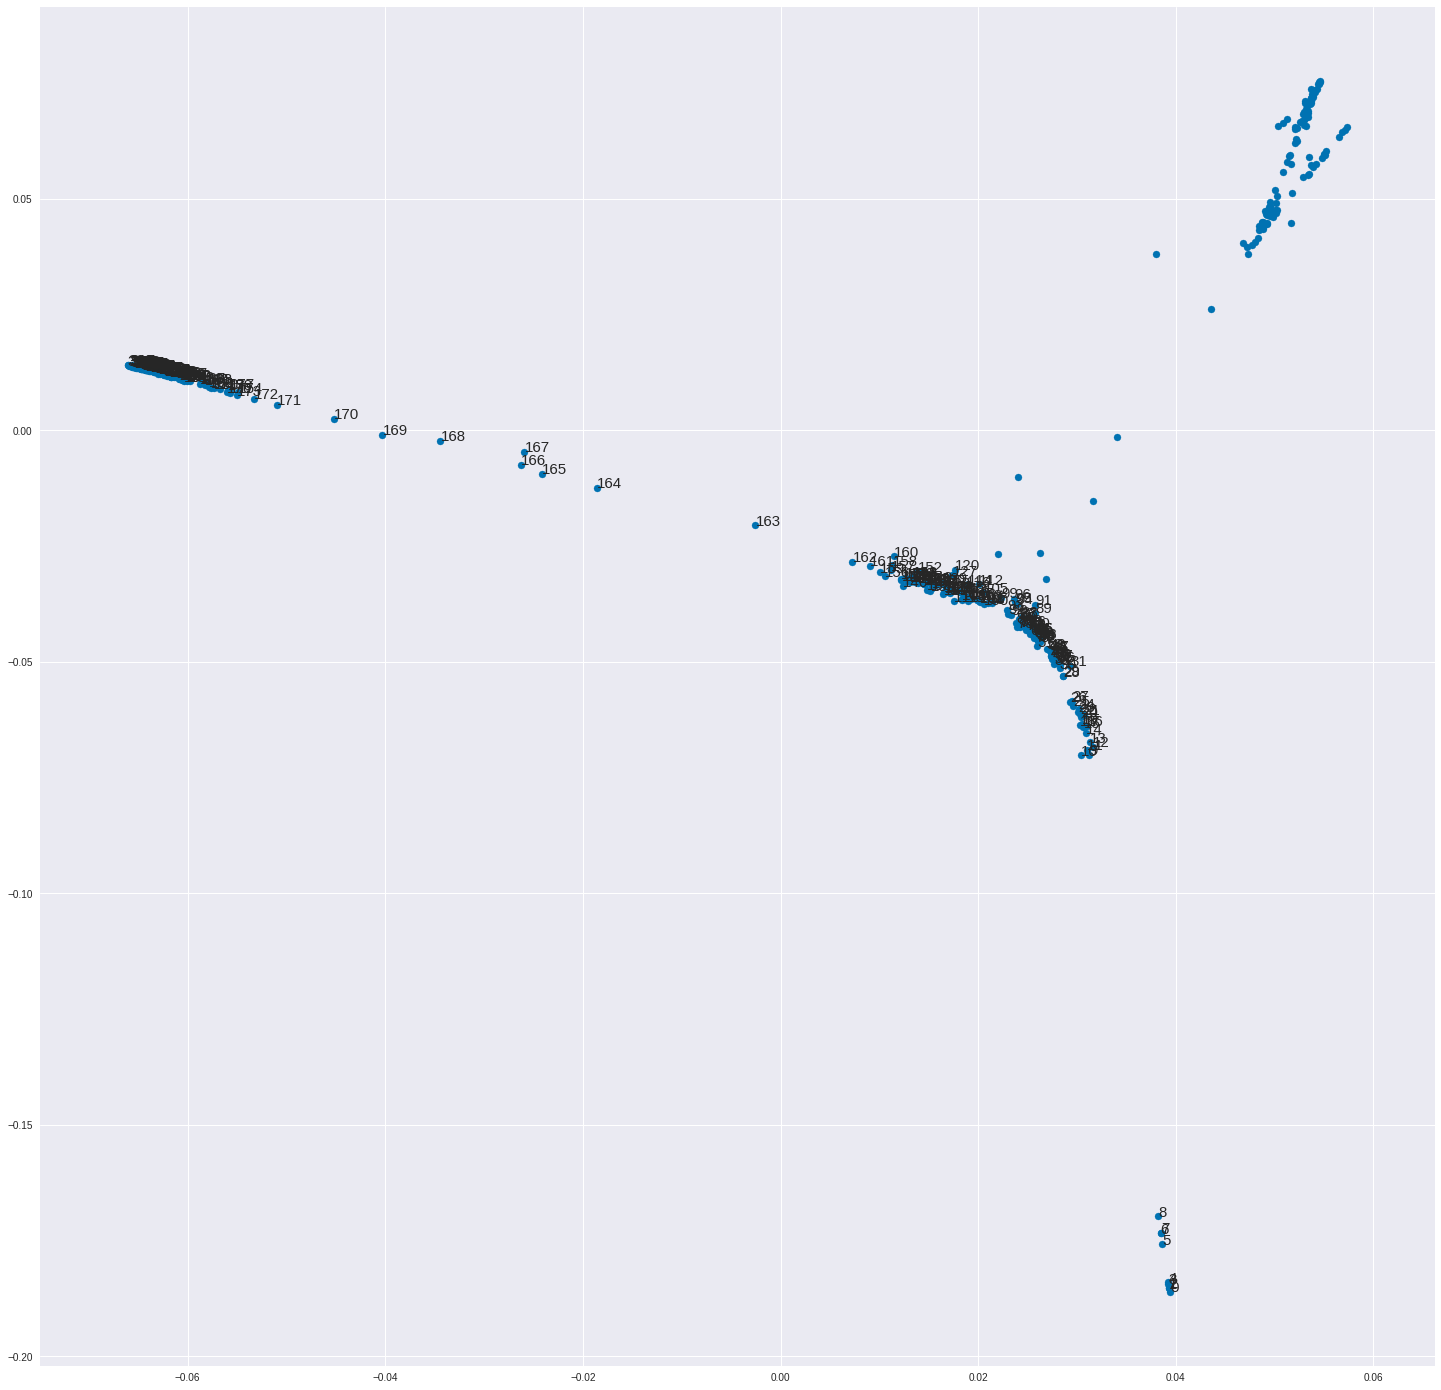

In [9]:
fig = plt.figure(figsize=(25,25))
plt.scatter(V[:,0],V[:,1])

#orders = sorted(range(len(cell_scores[0])), key=lambda k: cell_scores[0][k])

for ind,ord in enumerate(cell_order[0]):
        plt.annotate(ind,xy=(V[:,0][ord],V[:,1][ord]),fontsize=15)
    
plt.show()

In [10]:
cell_scores
order = sorted(range(len(cell_scores)), key=lambda k: cell_scores[k])
order = [cell_stage.values[i] for i in order]
print(order)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 5, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 7, 7, 6, 7, 7, 7, 6, 6, 7, 6, 7, 7, 7, 6, 6, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 

In [11]:
from scipy import stats
cor = stats.pearsonr(order,cell_stage.values)[0]
print(cor)

0.982076707042
